In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

/Users/noahgift/.socialpowernba/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
attendance_df = pd.read_csv("../data/nba_2017_attendance.csv");attendance_df.head()

,TEAM,GMS,TOTAL,AVG,PCT
0,Chicago Bulls,41,888882,21680,103.6
1,Dallas Mavericks,41,811366,19789,103.1
2,Sacramento Kings,41,721928,17608,100.6
3,Miami Heat,41,805400,19643,100.2
4,Toronto Raptors,41,813050,19830,100.2


In [3]:
endorsement_df = pd.read_csv("../data/nba_2017_endorsements.csv");endorsement_df.head()

,NAME,TEAM,SALARY,ENDORSEMENT
0,LeBron James,Cleveland Cavaliers,"$30,963,450.00","$55,000,000.00"
1,Kevin Durant,Golden State Warriors,"$26,500,000.00","$36,000,000.00"
2,Stephen Curry,Golden State Warriors,"$12,112,359.00","$35,000,000.00"
3,James Harden,Houston Rockets,"$26,500,000.00","$20,000,000.00"
4,Russell Westbrook,Oklahoma City Thunder,"$26,500,000.00","$15,000,000.00"


In [4]:
valuations_df = pd.read_csv("../data/nba_2017_team_valuations.csv");valuations_df.head()

,TEAM,VALUE_MILLIONS
0,New York Knicks,3300.0
1,Los Angeles Lakers,3000.0
2,Golden State Warriors,2600.0
3,Chicago Bulls,2500.0
4,Boston Celtics,2200.0


In [5]:
salary_df = pd.read_csv("../data/nba_2017_salary.csv");salary_df.head()

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,"$30,963,450.00"
1,Mike Conley,PG,Memphis Grizzlies,"$26,540,100.00"
2,Al Horford,C,Boston Celtics,"$26,540,100.00"
3,Dirk Nowitzki,PF,Dallas Mavericks,"$25,000,000.00"
4,Carmelo Anthony,SF,New York Knicks,"$24,559,380.00"


In [6]:
pie_df = pd.read_csv("../data/nba_2017_pie.csv");pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [7]:
plus_minus_df = pd.read_csv("../data/nba_2017_real_plus_minus.csv");plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


In [8]:
br_stats_df = pd.read_csv("../data/nba_2017_br.csv");br_stats_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


In [62]:
elo_df = pd.read_csv("../data/nba_2017_elo.csv");elo_df.head()

,ELO,TEAM,CONF
0,1770,Golden State Warriors,West
1,1661,San Antonio Spurs,West
2,1636,Los Angeles Clippers,West
3,1617,Utah Jazz,West
4,1602,Houston Rockets,West


In [91]:
attendance_valuation_df = attendance_df.merge(valuations_df, how="inner", on="TEAM")

In [92]:
attendance_valuation_df.head()

,TEAM,GMS,TOTAL,AVG,PCT,VALUE_MILLIONS
0,Chicago Bulls,41,888882,21680,103.6,2500.0
1,Dallas Mavericks,41,811366,19789,103.1,1450.0
2,Sacramento Kings,41,721928,17608,100.6,1075.0
3,Miami Heat,41,805400,19643,100.2,1350.0
4,Toronto Raptors,41,813050,19830,100.2,1125.0


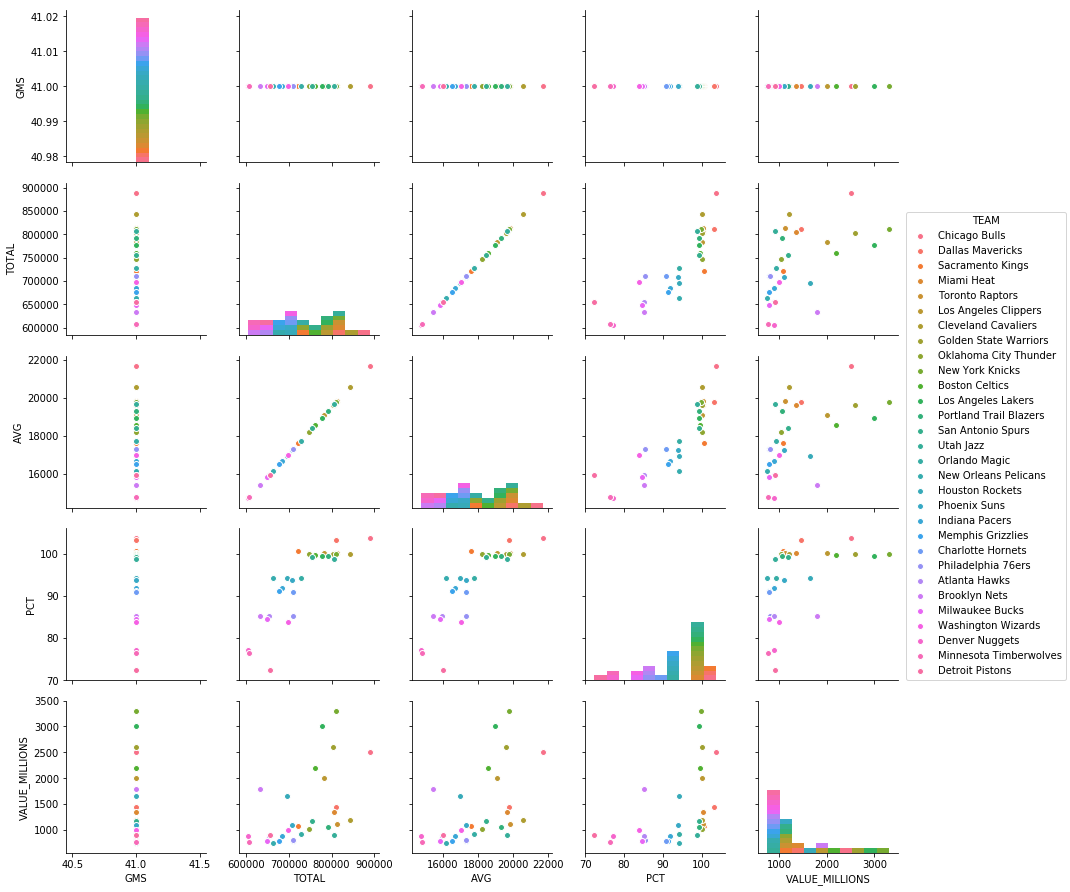

In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"));sns.pairplot(attendance_valuation_df, hue="TEAM")

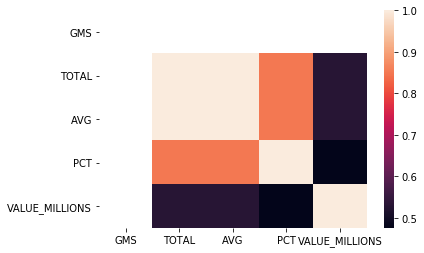

In [13]:
corr = attendance_valuation_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [48]:
attendance_valuation_df.to_csv("../data/nba_2017_att_val.csv")

In [44]:
valuations = attendance_valuation_df.pivot("TEAM", "AVG", "VALUE_MILLIONS")

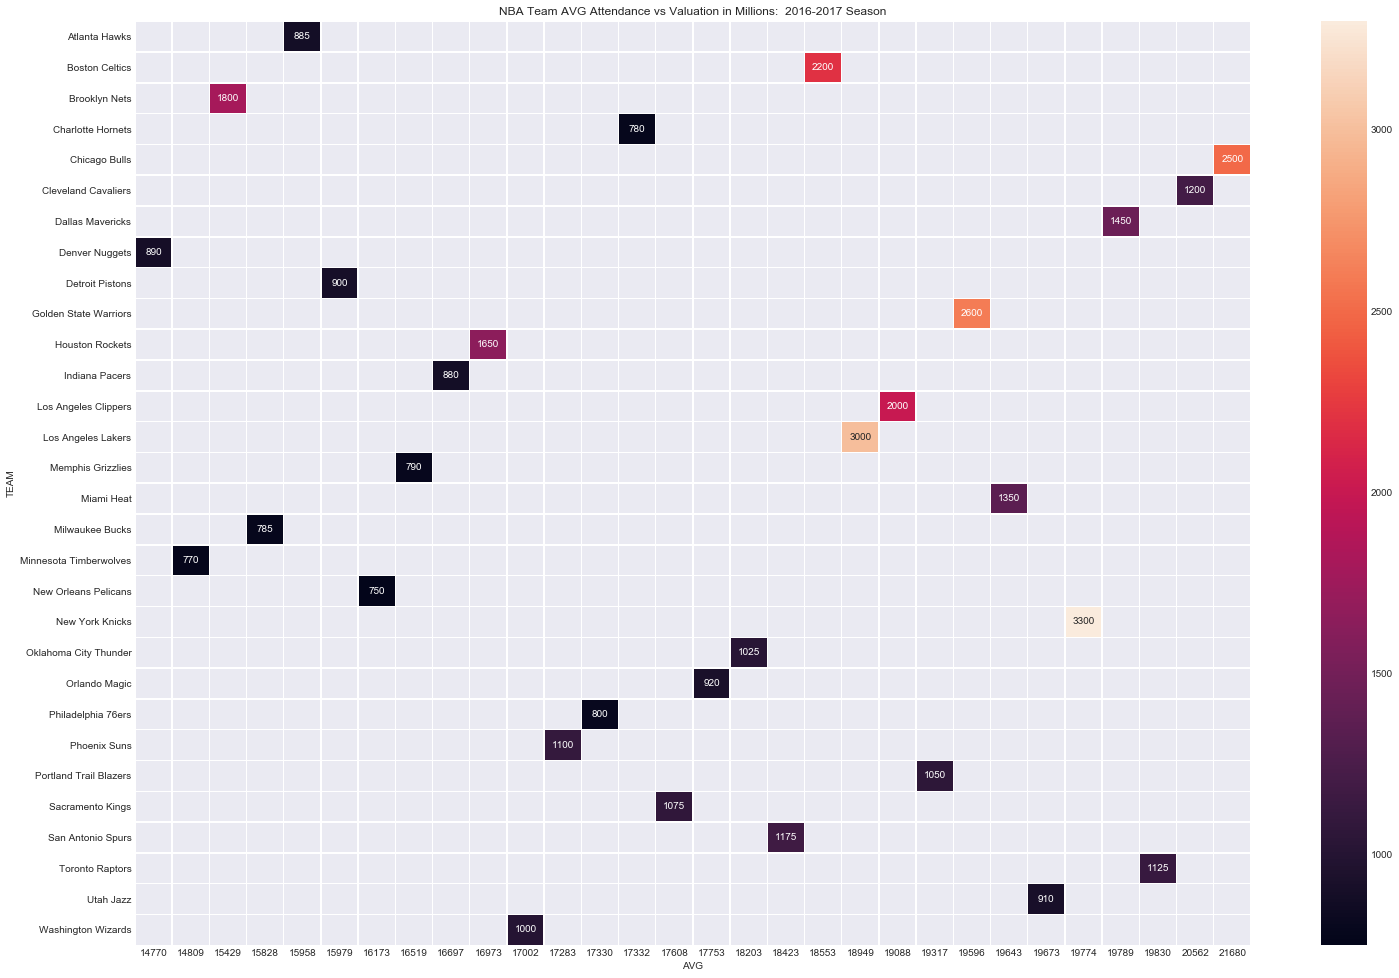

In [208]:
plt.subplots(figsize=(25,17))
ax = plt.axes()
ax.set_title("NBA Team AVG Attendance vs Valuation in Millions:  2016-2017 Season")
sns.heatmap(valuations,linewidths=.5, annot=True, fmt='g')

In [49]:
results = smf.ols('VALUE_MILLIONS ~AVG', data=attendance_valuation_df).fit()

In [56]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VALUE_MILLIONS   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     10.98
Date:                Sun, 30 Jul 2017   Prob (F-statistic):            0.00255
Time:                        15:49:55   Log-Likelihood:                -234.04
No. Observations:                  30   AIC:                             472.1
Df Residuals:                      28   BIC:                             474.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2408.0155   1141.235     -2.110      0.0

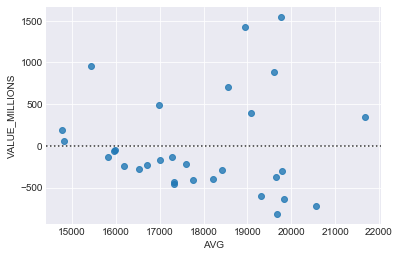

In [55]:
sns.residplot(y="VALUE_MILLIONS", x="AVG", data=attendance_valuation_df)

In [93]:
attendance_valuation_elo_df = attendance_valuation_df.merge(elo_df, how="inner", on="TEAM")

In [96]:
attendance_valuation_elo_df.head()

,TEAM,GMS,TOTAL,AVG,PCT,VALUE_MILLIONS,ELO,CONF
0,Chicago Bulls,41,888882,21680,103.6,2500.0,1519,East
1,Dallas Mavericks,41,811366,19789,103.1,1450.0,1420,West
2,Sacramento Kings,41,721928,17608,100.6,1075.0,1393,West
3,Miami Heat,41,805400,19643,100.2,1350.0,1569,East
4,Toronto Raptors,41,813050,19830,100.2,1125.0,1600,East


In [95]:
attendance_valuation_elo_df.to_csv("../data/nba_2017_att_val_elo.csv")

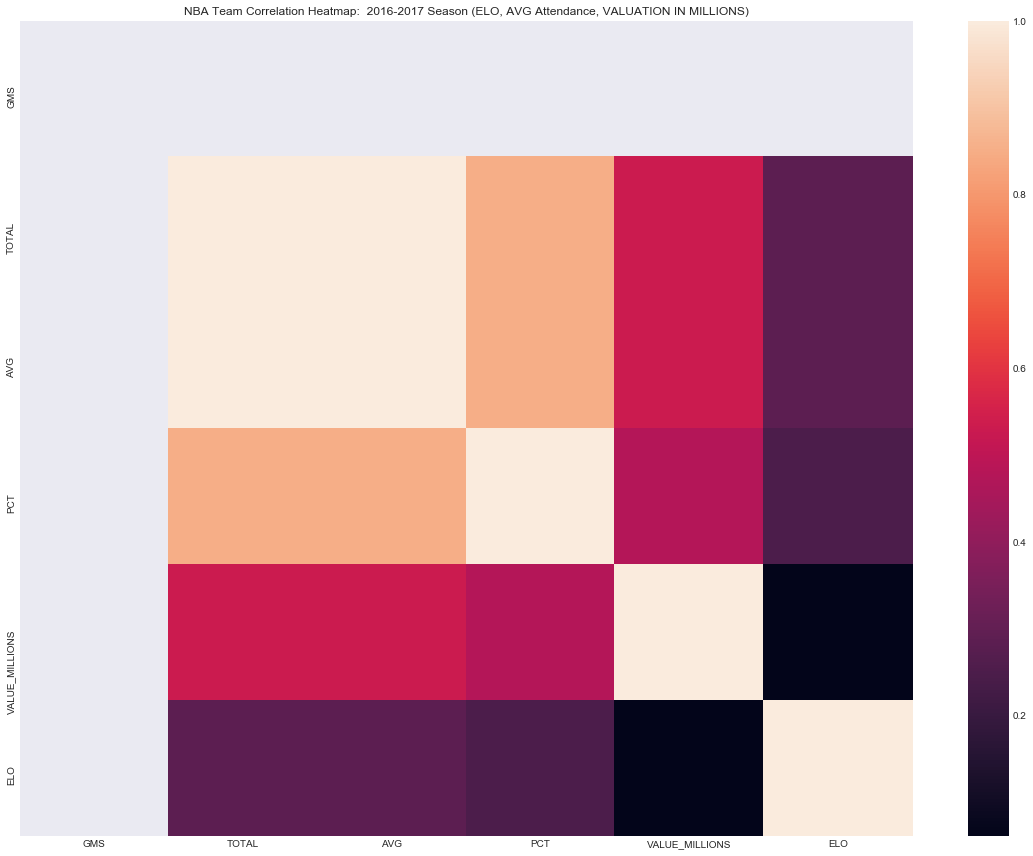

In [145]:
corr_elo = attendance_valuation_elo_df.corr()
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Team Correlation Heatmap:  2016-2017 Season (ELO, AVG Attendance, VALUATION IN MILLIONS)")
sns.heatmap(corr_elo, 
            xticklabels=corr_elo.columns.values,
            yticklabels=corr_elo.columns.values)

In [107]:
corr_elo

,GMS,TOTAL,AVG,PCT,VALUE_MILLIONS,ELO
GMS,NaN,NaN,NaN,NaN,NaN,NaN
TOTAL,NaN,1.000000,1.000000,0.852291,0.530697,0.285907
AVG,NaN,1.000000,1.000000,0.852301,0.530730,0.285930
PCT,NaN,0.852291,0.852301,1.000000,0.475642,0.249979
VALUE_MILLIONS,NaN,0.530697,0.530730,0.475642,1.000000,0.060575
ELO,NaN,0.285907,0.285930,0.249979,0.060575,1.000000


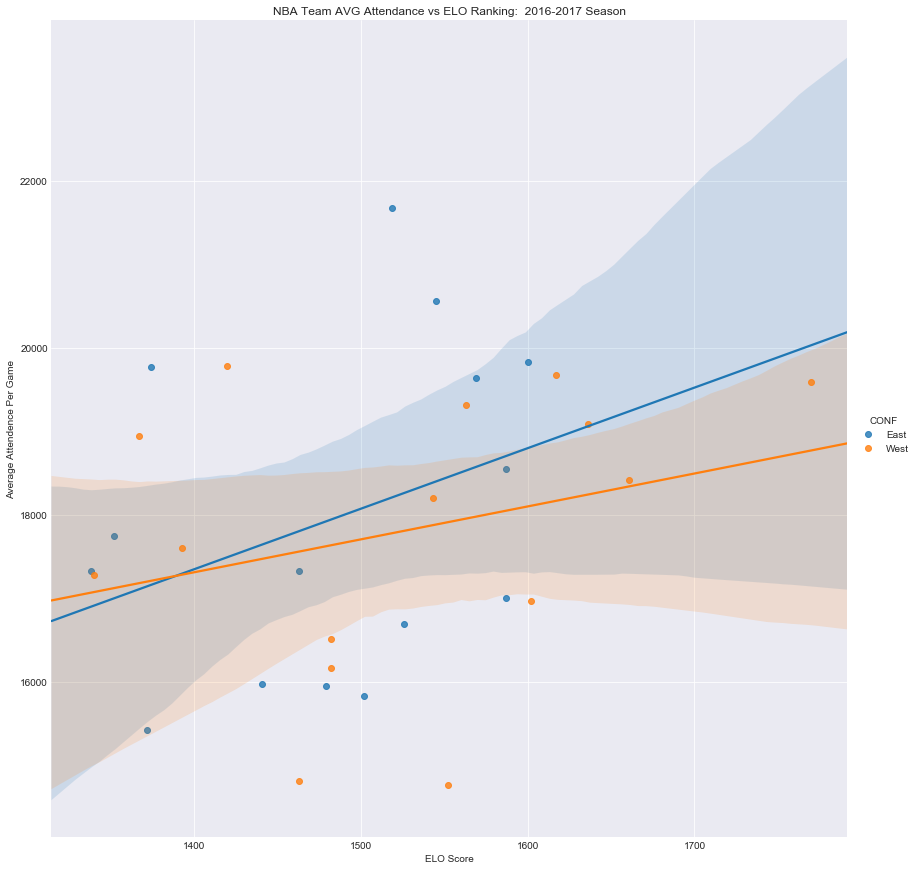

In [142]:
ax = sns.lmplot(x="ELO", y="AVG", data=attendance_valuation_elo_df, hue="CONF", size=12)
ax.set(xlabel='ELO Score', ylabel='Average Attendence Per Game', title="NBA Team AVG Attendance vs ELO Ranking:  2016-2017 Season")

In [133]:
attendance_valuation_elo_df.groupby("CONF")["ELO"].median()


CONF
East    1502
West    1543
Name: ELO, dtype: int64

In [134]:
attendance_valuation_elo_df.groupby("CONF")["AVG"].median()

CONF
East    17332
West    18203
Name: AVG, dtype: int64

In [120]:
results = smf.ols('AVG ~ELO', data=attendance_valuation_elo_df).fit()

In [121]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    AVG   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.493
Date:                Sun, 30 Jul 2017   Prob (F-statistic):              0.126
Time:                        17:21:01   Log-Likelihood:                -265.47
No. Observations:                  30   AIC:                             534.9
Df Residuals:                      28   BIC:                             537.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.068e+04   4575.980      2.333      0.0

In [146]:
from sklearn.cluster import KMeans

In [147]:
k_means = KMeans(n_clusters=3)

In [149]:
cluster_source = attendance_valuation_elo_df.loc[:,["AVG", "ELO", "VALUE_MILLIONS"]]

In [150]:
kmeans = k_means.fit(cluster_source)

In [151]:
attendance_valuation_elo_df['cluster'] = kmeans.labels_

In [174]:
attendance_valuation_elo_df.to_csv("../data/nba_2017_att_val_elo_with_cluster.csv")

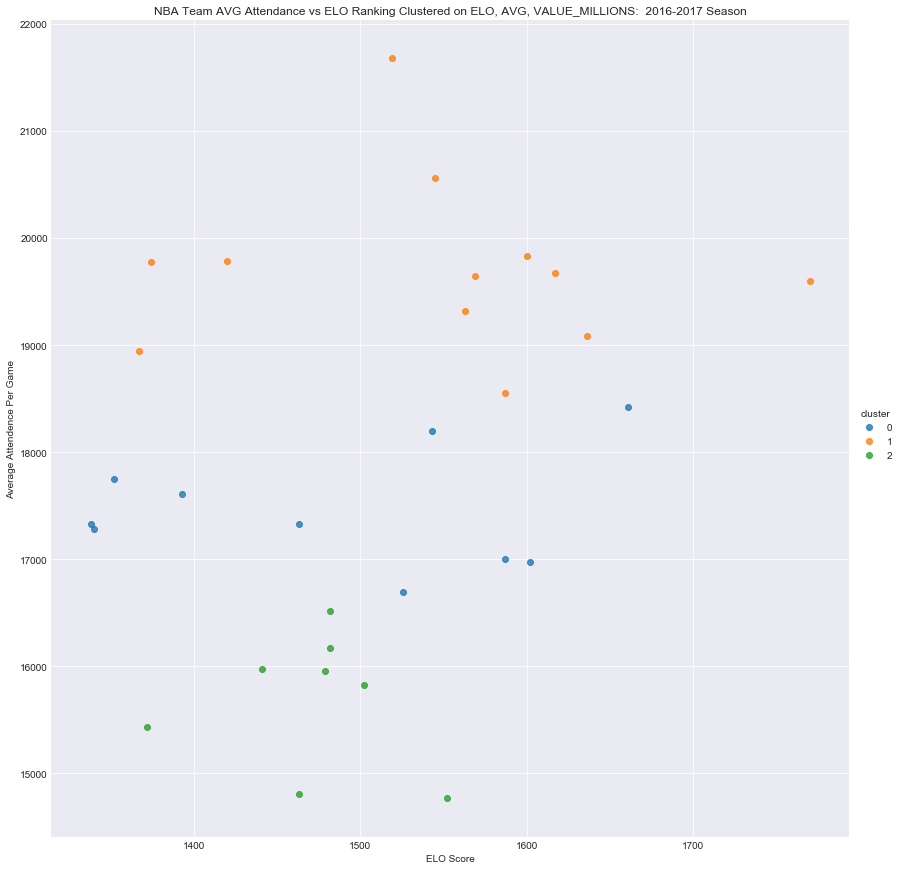

In [178]:
ax = sns.lmplot(x="ELO", y="AVG", data=attendance_valuation_elo_df,hue="cluster", size=12, fit_reg=False)
ax.set(xlabel='ELO Score', ylabel='Average Attendence Per Game', title="NBA Team AVG Attendance vs ELO Ranking Clustered on ELO, AVG, VALUE_MILLIONS:  2016-2017 Season")

In [176]:
kmeans.__dict__

{'algorithm': 'auto',
 'cluster_centers_': array([[ 17460.4       ,   1480.5       ,   1040.5       ],
        [ 19704.5       ,   1547.25      ,   1890.41666667],
        [ 15683.125     ,   1471.625     ,    946.25      ]]),
 'copy_x': True,
 'inertia_': 21707191.816666666,
 'init': 'k-means++',
 'labels_': array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0,
        2, 2, 2, 0, 2, 2, 2], dtype=int32),
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_iter_': 5,
 'n_jobs': 1,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [177]:
kmeans.cluster_centers_

array([[ 17460.4       ,   1480.5       ,   1040.5       ],
       [ 19704.5       ,   1547.25      ,   1890.41666667],
       [ 15683.125     ,   1471.625     ,    946.25      ]])

In [206]:
cluster_1 = attendance_valuation_elo_df["cluster"] == 1

In [207]:
attendance_valuation_elo_df[cluster_1]

,TEAM,GMS,TOTAL,AVG,PCT,VALUE_MILLIONS,ELO,CONF,cluster
0,Chicago Bulls,41,888882,21680,103.6,2500.0,1519,East,1
1,Dallas Mavericks,41,811366,19789,103.1,1450.0,1420,West,1
3,Miami Heat,41,805400,19643,100.2,1350.0,1569,East,1
4,Toronto Raptors,41,813050,19830,100.2,1125.0,1600,East,1
5,Los Angeles Clippers,41,782609,19088,100.1,2000.0,1636,West,1
6,Cleveland Cavaliers,41,843042,20562,100.0,1200.0,1545,East,1
7,Golden State Warriors,41,803436,19596,100.0,2600.0,1770,West,1
9,New York Knicks,41,810741,19774,99.8,3300.0,1374,East,1
10,Boston Celtics,41,760690,18553,99.6,2200.0,1587,East,1
11,Los Angeles Lakers,41,776917,18949,99.4,3000.0,1367,West,1
